<a href="https://colab.research.google.com/github/Aamina134/Msci-546-project/blob/main/SVMtrail3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline


In [10]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)


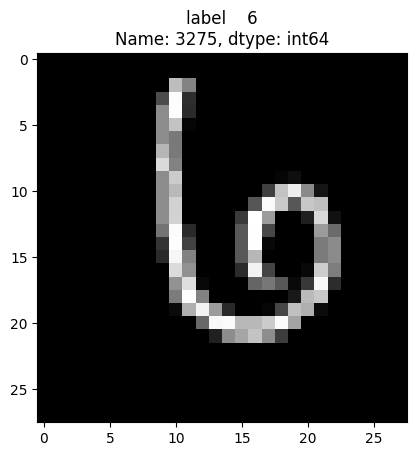

In [12]:
i = 1
img = train_images.iloc[i].to_numpy().reshape(28, 28)  # Use to_numpy() instead of as_matrix()
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i])
plt.show()

(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

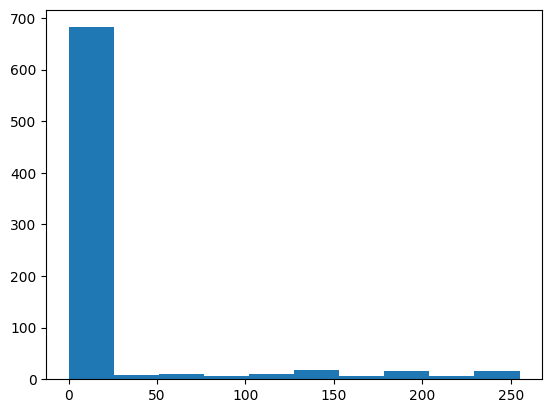

In [13]:
plt.hist(train_images.iloc[i])


In [14]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.942

<ipython-input-17-48ff0239e18f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_images = test_images.applymap(lambda x: 1 if x > 0 else 0)
<ipython-input-17-48ff0239e18f>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_images = train_images.applymap(lambda x: 1 if x > 0 else 0)


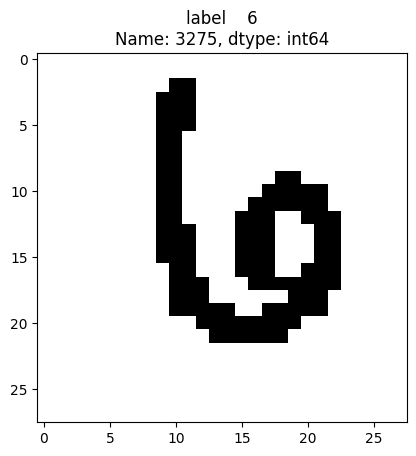

In [17]:
test_images = test_images.applymap(lambda x: 1 if x > 0 else 0)
train_images = train_images.applymap(lambda x: 1 if x > 0 else 0)

# Display the binarized image
i = 1
img = train_images.iloc[i].to_numpy().reshape((28, 28))  # Replace as_matrix() with to_numpy()
plt.imshow(img, cmap='binary')
plt.title(train_labels.iloc[i])
plt.show()

(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

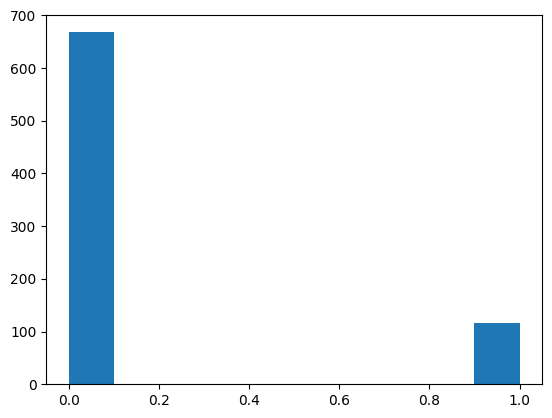

In [18]:
plt.hist(train_images.iloc[i])

In [25]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.929

In [20]:
test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])

In [21]:
results

array([2, 0, 9, ..., 1, 7, 3])

In [22]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

Visulizing the output

Sample Predictions:
    ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3

Total Predictions: 5000

Distribution of Predicted Digits:
 Label
0    525
1    564
2    490
3    505
4    468
5    453
6    508
7    492
8    470
9    525
Name: count, dtype: int64

Most Predicted Digit: 1 (Count: 564)
Least Predicted Digit: 5 (Count: 453)


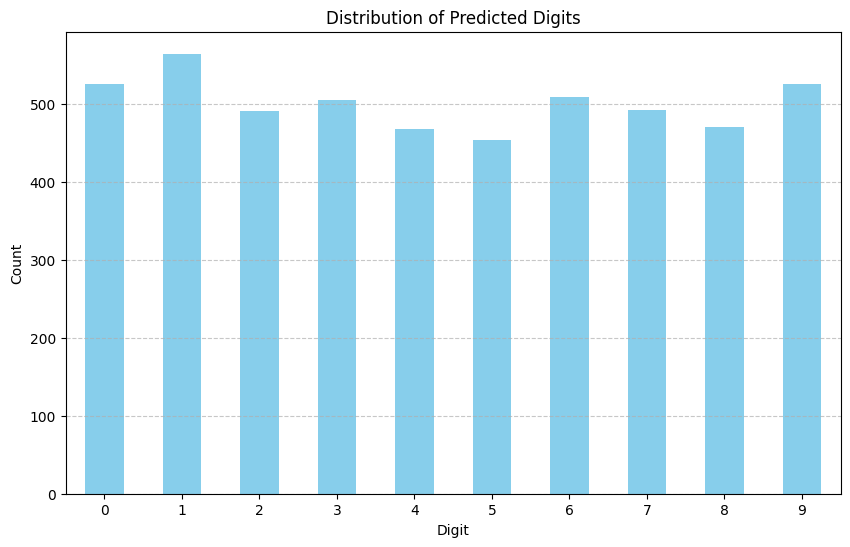

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV or Excel file
# For CSV:
results_df = pd.read_csv('results.csv')

# If you're using Excel, uncomment the line below:
# results_df = pd.read_excel('results.xlsx')

# Display the first few rows of the file to understand its structure
print("Sample Predictions:\n", results_df.head())

# 1. Total number of predictions
total_predictions = len(results_df)
print(f"\nTotal Predictions: {total_predictions}")

# 2. Distribution of predicted digits (counts of each digit)
digit_counts = results_df['Label'].value_counts().sort_index()
print("\nDistribution of Predicted Digits:\n", digit_counts)

# 3. Most and least predicted digits
most_predicted_digit = digit_counts.idxmax()
least_predicted_digit = digit_counts.idxmin()
print(f"\nMost Predicted Digit: {most_predicted_digit} (Count: {digit_counts.max()})")
print(f"Least Predicted Digit: {least_predicted_digit} (Count: {digit_counts.min()})")

# 4. Visualize the distribution with a bar chart
plt.figure(figsize=(10, 6))
digit_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Digits')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()